In [69]:
pip install plotly 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
 
from scipy.stats import mode,kurtosis,skew

## Importing the country wise data

In [8]:
coun_wise = pd.read_csv('country_wise_latest.csv')
coun_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
coun_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [6]:
coun_wise.isna().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [5]:
coun_wise.drop(['New recovered','Confirmed last week'],axis=1,inplace=True)
coun_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,3.50,69.49,5.04,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,2.95,56.25,5.25,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,4.16,67.34,6.17,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,5.73,88.53,6.48,23,2.60,Europe
4,Angola,950,41,242,667,18,1,4.32,25.47,16.94,201,26.84,Africa


In [7]:
coun_wise.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.00,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,3.019519,64.820535,inf,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,3.454302,26.287694,NaN,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.945000,48.770000,1.45,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,2.150000,71.320000,3.62,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,3.875000,86.885000,6.44,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,28.560000,100.000000,inf,455582.000000,226.320000


#### Confermed Cases As per Countries...

In [124]:
top_20 = coun_wise.sort_values(by=['Confirmed'], ascending=False).head(20)
top_20

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,3.45,30.90,11.16,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,3.59,75.61,4.74,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,2.26,64.26,3.51,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,1.63,73.74,2.21,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,1.56,60.75,2.57,78901,21.12,Africa
111,Mexico,395489,44022,303810,47657,4973,342,11.13,76.82,14.49,46093,13.19,Americas
132,Peru,389717,18418,272547,98752,13756,575,4.73,69.93,6.76,32036,8.96,Americas
35,Chile,347923,9187,319954,18782,2133,75,2.64,91.96,2.87,14894,4.47,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,15.19,0.48,3190.26,4764,1.60,Europe
81,Iran,293606,15912,255144,22550,2434,212,5.42,86.90,6.24,17404,6.30,Eastern Mediterranean


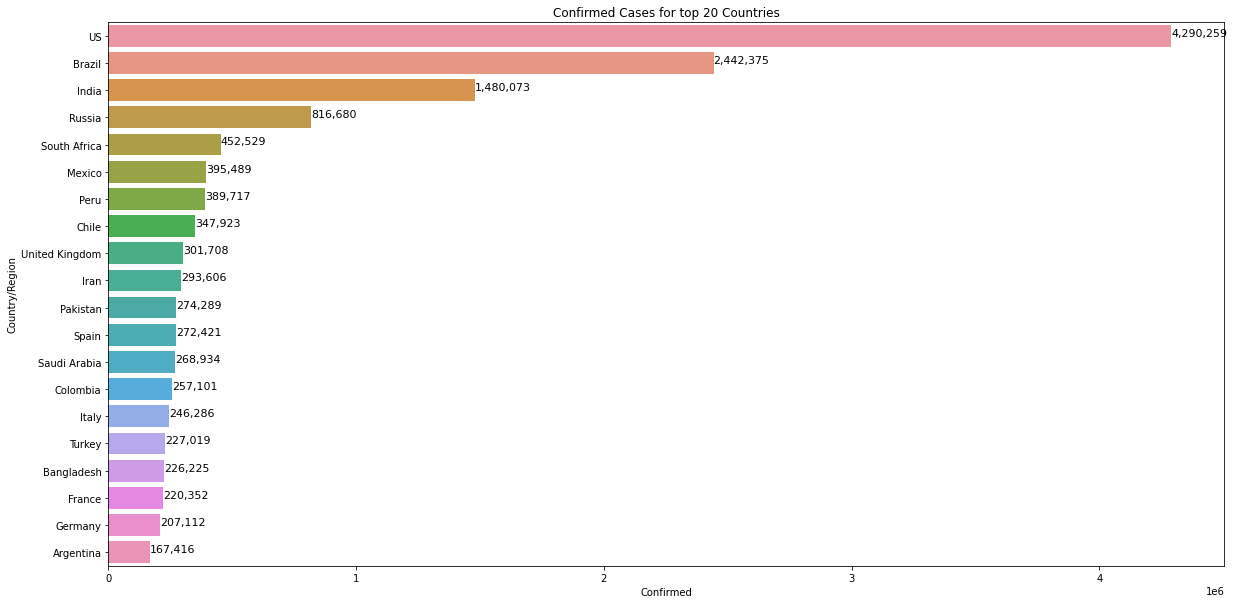

In [128]:
plt.figure(figsize=(20,10))
plot = sns.barplot(top_20['Confirmed'], top_20['Country/Region'])
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country/Region'])):
    plot.text(value,i-0.001,f'{value:,.0f}',size=11)
plt.title('Confirmed Cases for top 20 Countries')
plt.show()

In [112]:
figure = px.choropleth(coun_wise,locations='Country/Region', locationmode='country names', color='Confirmed', hover_name='Country/Region',
                       color_continuous_scale='geyser', range_color=[1,1000000],title='Countries with Confirmed cases in millions')
figure.show()

### Confermed Cases and Active Cases....

In [48]:
top_10 = coun_wise.sort_values(by=['Confirmed'], ascending=False).head(10)
top_10

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,3.45,30.90,11.16,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,3.59,75.61,4.74,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,2.26,64.26,3.51,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,1.63,73.74,2.21,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,1.56,60.75,2.57,78901,21.12,Africa
111,Mexico,395489,44022,303810,47657,4973,342,11.13,76.82,14.49,46093,13.19,Americas
132,Peru,389717,18418,272547,98752,13756,575,4.73,69.93,6.76,32036,8.96,Americas
35,Chile,347923,9187,319954,18782,2133,75,2.64,91.96,2.87,14894,4.47,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,15.19,0.48,3190.26,4764,1.60,Europe
81,Iran,293606,15912,255144,22550,2434,212,5.42,86.90,6.24,17404,6.30,Eastern Mediterranean


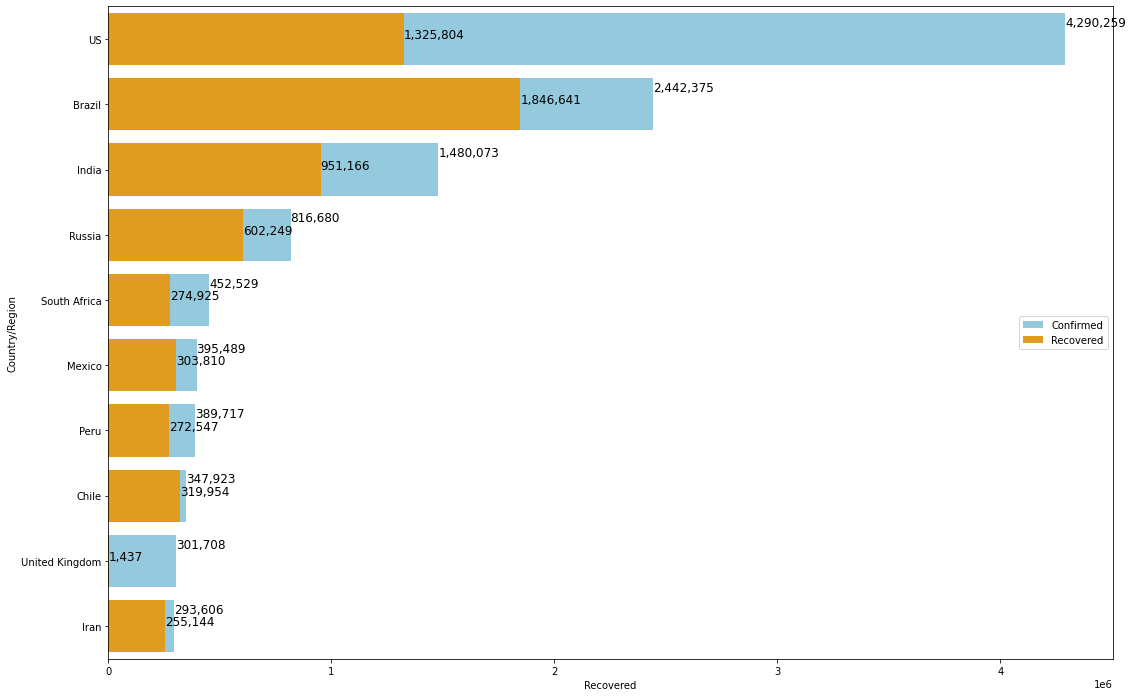

In [107]:
plt.figure(figsize=(18,12))
confirmed = sns.barplot(top_10['Confirmed'], top_10['Country/Region'], color = 'skyblue', label='Confirmed')
recovered = sns.barplot(top_10['Recovered'], top_10['Country/Region'], color = 'orange',label='Recovered')
for i,(value,name) in enumerate(zip(top_10['Confirmed'],top_10['Country/Region'])):
    confirmed.text(value,i-0.20,f'{value:,.0f}',size=12)

for i,(value,name) in enumerate(zip(top_10['Recovered'],top_10['Country/Region'])):
    recovered.text(value,i-0.01,f'{value:,.0f}',size=12)
plt.legend(loc=5)
plt.show()

## Active Cases.......

In [98]:
figure = px.choropleth(coun_wise,locations='Country/Region', locationmode='country names', color='Active', hover_name='Country/Region',
                       color_continuous_scale='earth', range_color=[1,1000000],title='Countries with Active cases in millions')
figure.show()

In [70]:
top_20 = coun_wise.sort_values(by=['Deaths'], ascending=False).head(20)
top_20

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,3.45,30.90,11.16,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,3.59,75.61,4.74,323729,15.28,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,15.19,0.48,3190.26,4764,1.60,Europe
111,Mexico,395489,44022,303810,47657,4973,342,11.13,76.82,14.49,46093,13.19,Americas
85,Italy,246286,35112,198593,12581,168,5,14.26,80.64,17.68,1662,0.68,Europe
79,India,1480073,33408,951166,495499,44457,637,2.26,64.26,3.51,324735,28.11,South-East Asia
61,France,220352,30212,81212,108928,2551,17,13.71,36.86,37.20,6329,2.96,Europe
157,Spain,272421,28432,150376,93613,0,0,10.44,55.20,18.91,7585,2.86,Europe
132,Peru,389717,18418,272547,98752,13756,575,4.73,69.93,6.76,32036,8.96,Americas
81,Iran,293606,15912,255144,22550,2434,212,5.42,86.90,6.24,17404,6.30,Eastern Mediterranean


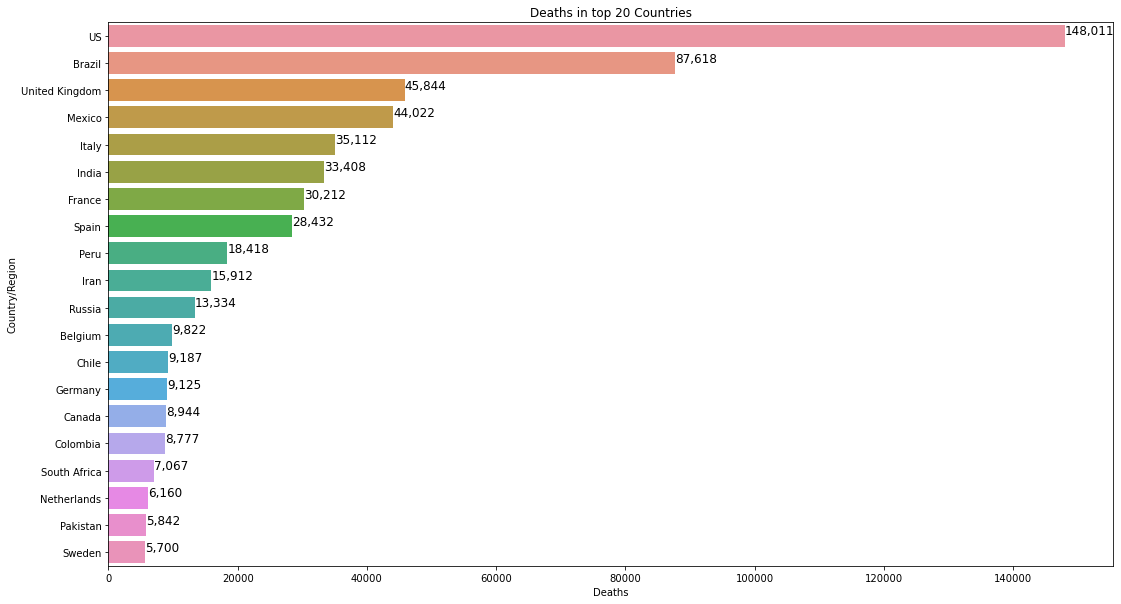

In [71]:
plt.figure(figsize=(18,10))
plot = sns.barplot(top_20['Deaths'], top_20['Country/Region'])

for i,(value,name) in enumerate(zip(top_20['Deaths'],top_20['Country/Region'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=12)
    

plt.title('Deaths in top 20 Countries')
plt.show()

In [92]:
figure = px.choropleth(coun_wise,locations='Country/Region', locationmode='country names', color='Deaths', hover_name='Country/Region',
                       color_continuous_scale='balance', range_color=[1,100000],title='Countries with Deaths in millions')
figure.show()

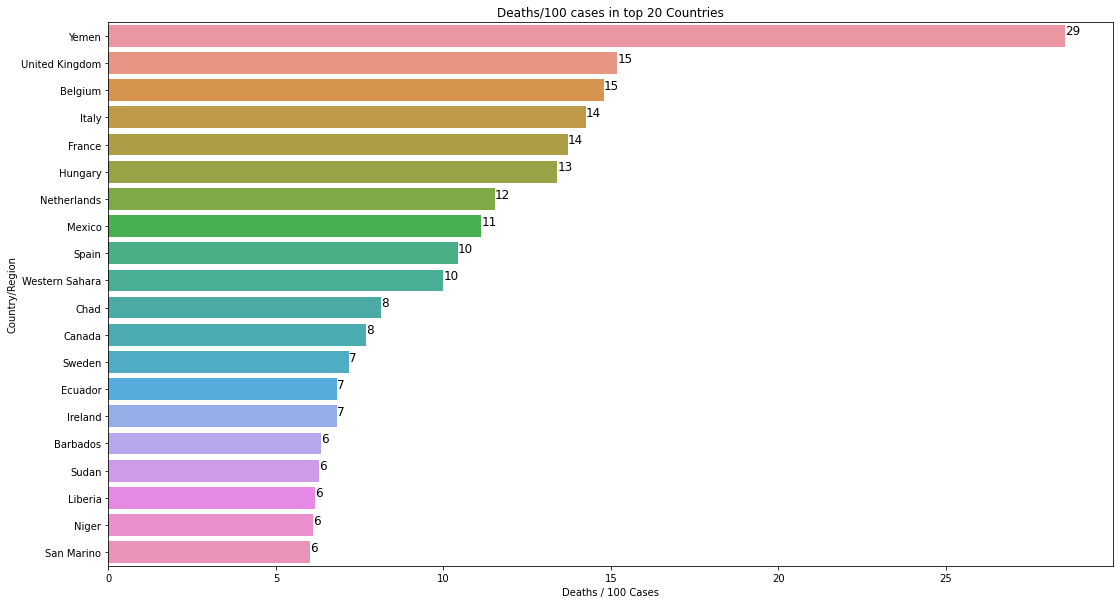

In [80]:
top_20 = coun_wise.sort_values(by=['Deaths / 100 Cases'], ascending=False).head(20)
plt.figure(figsize=(18,10))
plot = sns.barplot(top_20['Deaths / 100 Cases'], top_20['Country/Region'])

for i,(value,name) in enumerate(zip(top_20['Deaths / 100 Cases'],top_20['Country/Region'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=12)
    

plt.title('Deaths/100 cases in top 20 Countries')
plt.show()

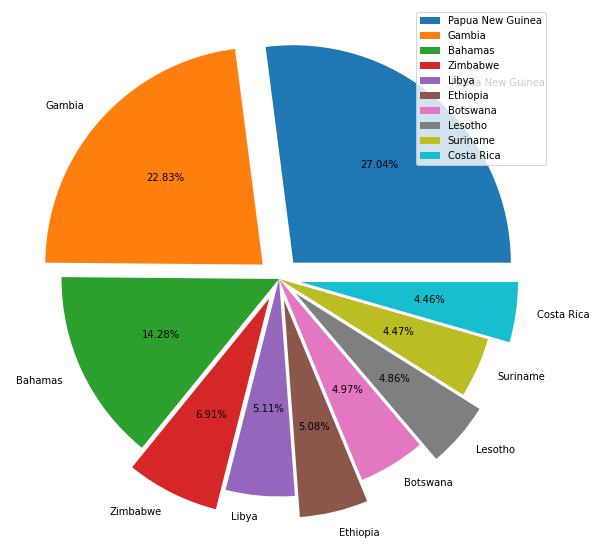

In [122]:
pie = coun_wise.sort_values(by=['1 week % increase'], ascending=False).head(10)
plt.figure(figsize=(10,10))
plt.pie(pie['1 week % increase'],explode=(0.1,0.1,0,0.1,0,0.1,0,0.1,0,0.1),labels=pie['Country/Region'],autopct='%1.2f%%')
plt.legend()